In [24]:
'''
Name    : Priyak Thakkar
Program : Cart Pole (Linear Quadratic Regulator (LQR) / Algebraic Riccati Equation (ARE))
Date    : 19th Octomber 2021
Time    : 3:37 AM (California, San Jose)

'''

'\nName    : Priyak Thakkar\nProgram : Cart Pole (Linear Quadratic Regulator (LQR) / Algebraic Riccati Equation (ARE))\nDate    : 19th Octomber 2021\nTime    : 3:10 AM (California, San Jose)\n\n'

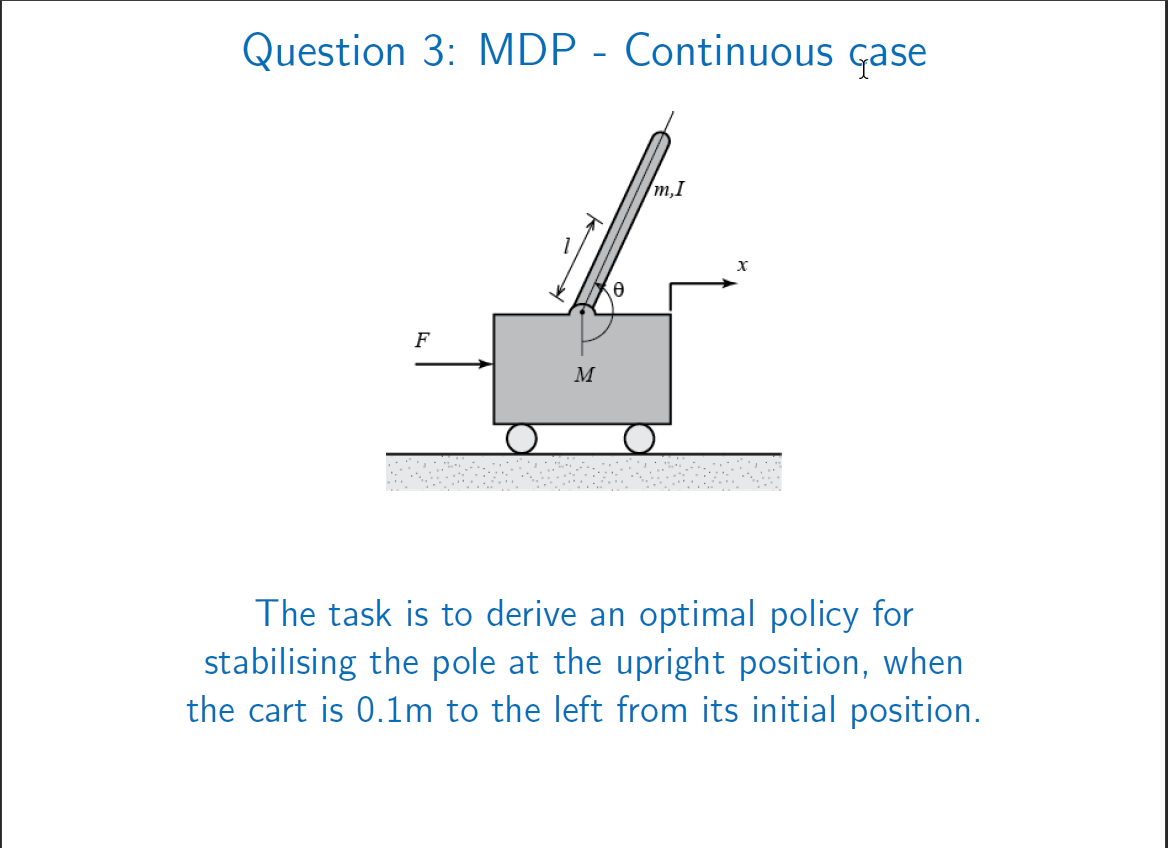

In [25]:
Image('C:\\Users\\pthak\\OneDrive\\Pictures\\Screenshots\\Screenshots\\2021-10\\Q3.png')

In [26]:
import numpy as np
import random
from IPython.display import Image

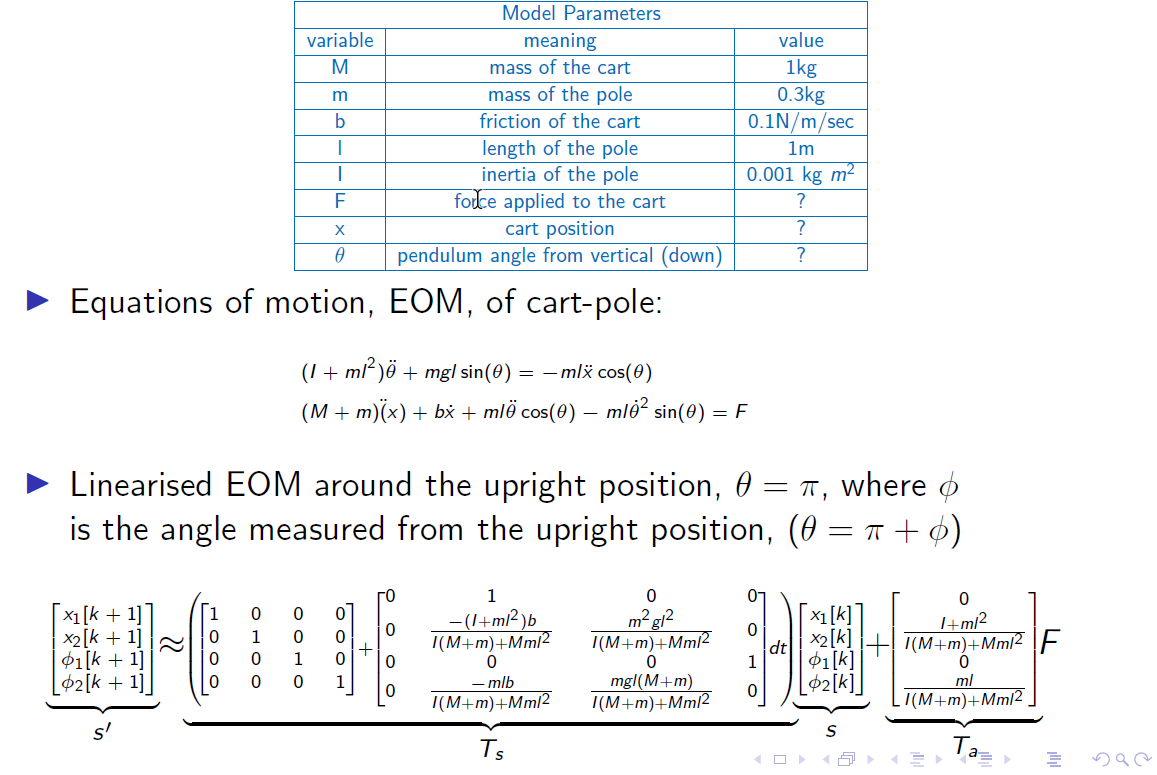

In [27]:
Image('C:\\Users\\pthak\\OneDrive\\Pictures\\Screenshots\\Screenshots\\2021-10\\Q31.png')

In [28]:
M = 1
m = 0.3
b = 0.1
l = 1
I = 0.001
g = 9.8


A = (I + (m*(l**2))*b)
B = (I*(M+m) + (M*m*(l)**2))
C = ((m**2)*g*(l**2))
D = (-m*l*b)
E = ((m*g*l)*(M+m))
F = (m*l)

AA = -A/B
BB = C/B
CC = D/B
DD = E/B

EE = A/B
FF = F/B



Identity = np.identity(4, dtype = float)

Tb = np.array([
            [0, 1,  0,  0],
            [0, AA, BB, 0],
            [0, 0,  0,  1],
            [0, CC, DD, 0]]) 

Ta = np.array([0, EE, 0, FF]) * dt

Ts = Identity + (Tb)*dt


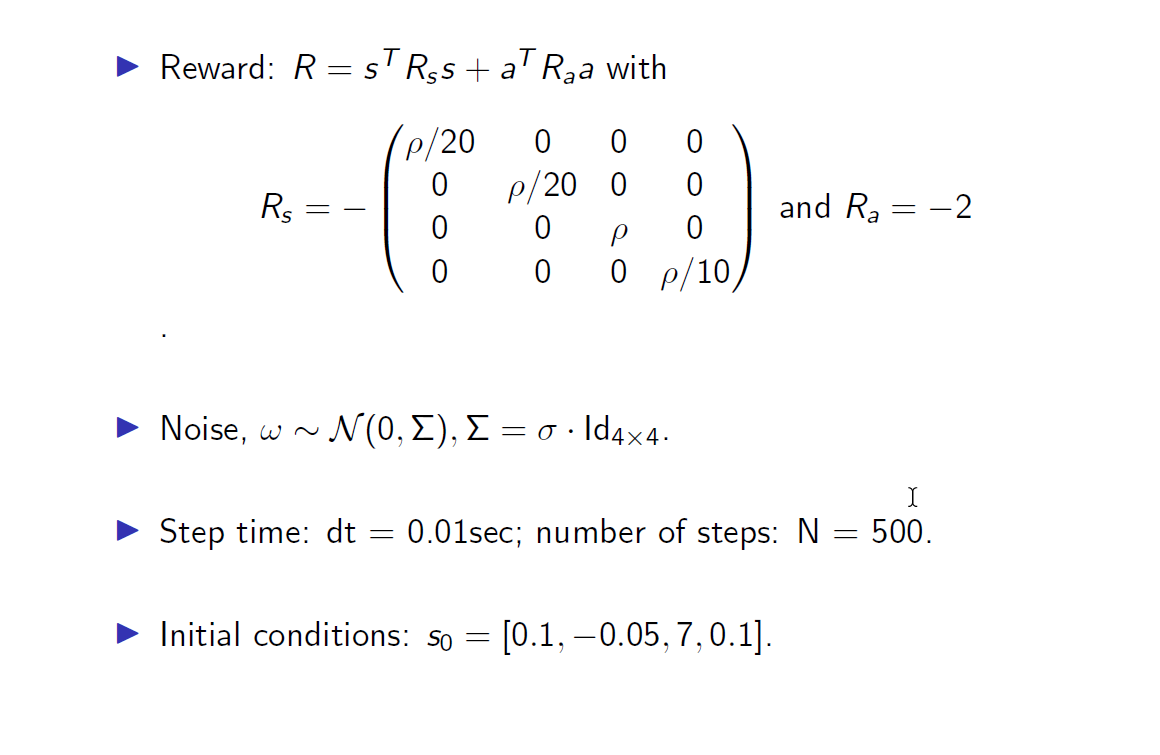

In [29]:
Image('C:\\Users\\pthak\\OneDrive\\Pictures\\Screenshots\\Screenshots\\2021-10\\Q32.png')

In [30]:
N = 500
dt = 0.01

Ra = -2
#change here for alpha value which is noise
alpha = 0.01
noise = np.identity(4, dtype = float) * alpha

# Generate the S' function over here
def s_(s,f):
    # S_desh = (Ts @ s) + (Ta*f)
    S_desh = (np.dot(Ts,s)) + (np.dot(Ta,f))
    return S_desh

# Initialize the Force matrix for Training
force = [[]]*N
force[N-1] = 0.5
for i in range(N-2,-1,-1): 
    force[i] = random.randint(-2,2)
print("force", force[0])

# Initialize s0 = [0.1, -0.05, 7, 0.1] and Calculate the S'(new) values and store it for further calculation
S_desh = [[]]* N
S_desh[N-1] = [0.1, -0.05, 7, 0.1]
for i in range(N-2,-1,-1):
    S_desh[i] = s_(S_desh[i+1], force[i+1])
print("S_desh", S_desh[0])

# Generate the Rewards with the help of Force and the S'
rewd = [[]]*N
def Reward(rho):
    Rs =np.array([
            [rho/20, 0, 0, 0],
            [0, rho/20, 0, 0],
            [0,  0,   rho, 0],
            [0, 0, 0, rho/10]]) * (-1)
    
    rewd[N-1] = Rs
    print("Reward at N : ", rewd[N-1])
    print("Reward at 0 : ", rewd[0])
    print("------------------------------------------- before")
    for i in range(N-2,-1,-1):
        rewd[i]= np.dot(np.dot(S_desh[i].transpose(),Rs),S_desh[i]) + (force[i]*Ra*force[i])
    # r = (s.tranpose() @ Rs @ s) + (f.transpose() @ Ra @ f)
    return True

force -1
S_desh [2.88723103e+07 1.02507883e+08 1.27929331e+08 4.54198650e+08]


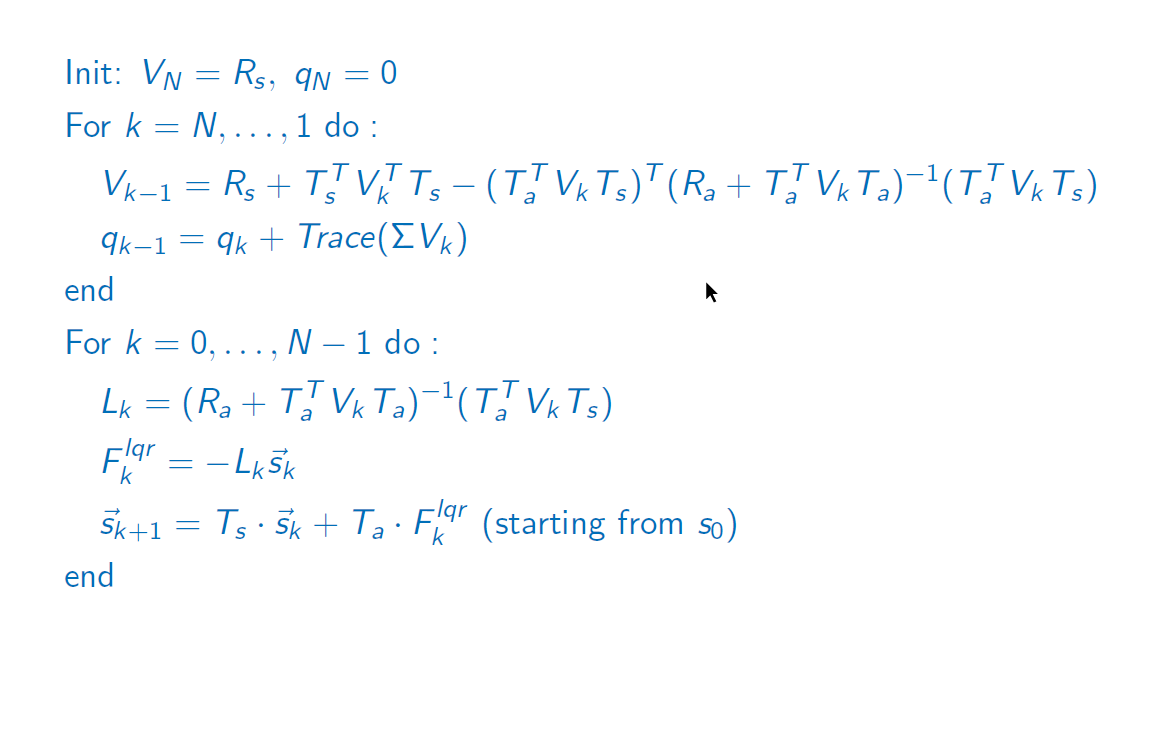

In [31]:
Image('C:\\Users\\pthak\\OneDrive\\Pictures\\Screenshots\\Screenshots\\2021-10\\Q33.png')

In [32]:
new_s = [[]]*(N+1)
new_s[0] = S_desh[N-1]

Qn = [[]]*N
Qn[N-1] = 0 

V = [[]]*N

print("V at N :", V[499])
F_lqr = [[]]*N
L_k = [[]]*N

def LQR():
    print("LQR S_desh", S_desh[N-1])
    print("LQR Reward : ", rewd[N-1])
    V[N-1] = rewd[N-1]
    total_V = np.identity(4, dtype = float)

    for i in range(N-1, -1, -1):

        # print("Ts : ",Ts.transpose())
        # print("V[i]", V[i])
        # print("Dot pro : ",np.dot(Ts.transpose(), V[i]))
        a = np.dot(np.dot(Ts.transpose(), V[i]), Ts)
        # print("A :", a)

        b = np.dot(np.dot(Ta.transpose(), V[i]), Ts)
        # print("B :", b)
        
        c =  Ra + np.dot(np.dot(Ta.transpose(), V[i]), Ta)
        # print("C :", c)
        # d = np.dot(Ts, np.dot(Ta.transpose(), V[i]))

        V[i-1] = rewd[i] + a - (b.transpose())*(1/c) * b
        # print("LQR loop :", V[i])
        # print("total_V",total_V)
        total_V += V[i]
        # print("total_V",total_V)
        Qn[i-1] = Qn[i] + total_V.trace()

        
    for i in range(0, N, 1):
        a = Ra + np.dot(np.dot(Ta.transpose(), V[i]), Ta)
        b = np.dot(np.dot(Ta.transpose(), V[i]), Ts)

        L_k[i] = (1/a) * b 
        # print(L_k[i])
        # print("s desh", S_desh[i])
        F_lqr[i] = np.dot(-L_k[i], new_s[i])
        new_s[i+1] = np.dot(Ts, new_s[i]) + np.dot(Ta,F_lqr[i]) + noise


V at N : []


In [33]:
if Reward(10): 
    LQR()
    print("Here is the 1st and the last values for Qn, Means program worked.")
    print("Qn: ", Qn[0])
    print("Qn: ", Qn[N-1])

Reward at N :  [[ -0.5  -0.   -0.   -0. ]
 [ -0.   -0.5  -0.   -0. ]
 [ -0.   -0.  -10.   -0. ]
 [ -0.   -0.   -0.   -1. ]]
Reward at 0 :  []
------------------------------------------- before
LQR S_desh [0.1, -0.05, 7, 0.1]
LQR Reward :  [[ -0.5  -0.   -0.   -0. ]
 [ -0.   -0.5  -0.   -0. ]
 [ -0.   -0.  -10.   -0. ]
 [ -0.   -0.   -0.   -1. ]]
Here is the 1st and the last values for Qn, Means program worked.
Qn:  -6.596010020566658e+20
Qn:  -7.073148788254836e+20


In [34]:
""""Question A
    
    Matrix of our F_lqr, which is an optimal policy

    Now, generate the new F_lqr with differnt rho and noise
    change rho : Reward(rho)
    change noise : Manually change the value of Alpha in program above

    I don't have time for plotting as I have many things pending.
    But, I will plot the graphs and will let you know, Just for my own satisfaction.

    Thank you Professor.

"""

print(F_lqr)

[-891.7775505151263, array([  -35.437005  ,   263.37207491, -2427.44507817,  2734.4938278 ]), array([-10842.7964839 , -10490.19521489, -13666.52370693,  -7574.54180103]), array([19878.10187099, 20204.26737635, 17266.85721001, 22902.11285015]), array([-74217.35166389, -73835.91741924, -77273.58742284, -70681.77199399]), array([201835.21667065, 202189.62518841, 198996.81216039, 205121.76807092]), array([-645402.94055784, -644991.457939  , -648702.23116459,
       -641588.58247404]), array([1849345.10420754, 1849728.7774071 , 1846270.52426755,
       1852903.89537888]), array([-5809051.94306772, -5808609.05304856, -5812606.00261744,
       -5804946.03564162]), array([16751106.12456609, 16751520.22416271, 16747785.2187632 ,
       16754948.13947106]), array([-52505974.04816182, -52505498.24145334, -52509795.81452373,
       -52501562.44208367]), array([1.51521874e+08, 1.51522320e+08, 1.51518295e+08, 1.51526011e+08]), array([-4.74821817e+08, -4.74821307e+08, -4.74825921e+08, -4.74817084e+08